*Presented by: Reza Saadatyar (2023-2024)*<br>
*E-mail: Reza.Saadatyar92@gmail.com*

**Reinforcement learning**<br/>

![RL model.JPG](<attachment:RL model.JPG>) 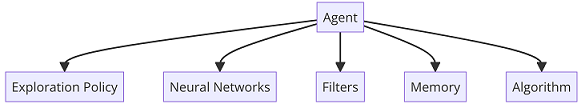

 **Elements of RL:**
 - Agent: The ability to interpret the environment and act on it.
 - Environment: Physical environment where the agent operates.
 - Action: Execution of actions by the agent.
 - State: The current state of the agent.
 - Reward: Feedback from the environment after the agent evaluates its actions.
 - Policy: The method by which the agent decides what action to take based on the current situation.
 - Value: The reward that an agent will receive for acting in a particular state.
---
**K-Arms Bandit Problem:**<br/>
It is a classic problem in reinforcement learning and decision theory. You have K slot machines (bandits) with unknown reward probabilities. You can choose to pull one bandit's arm at each time step and receive a reward based on its distribution. The objective is to maximize the total reward over a series of pulls. <br/>
The objective is to find the optimal strategy (policy) for selecting bandits over time to maximize cumulative reward. This involves a trade-off between *`exploration`* (trying out different bandits to learn their reward distributions) and *`exploitation`* (choosing the bandit that currently appears to yield the highest reward based on available data).<br/>

Several strategies exist to solve the K-Armed Bandit Problem:
- `Epsilon-Greedy:` Choose the bandit that currently appears best with probability 1 − 𝜖 and choose randomly (explore) with probability 𝜖.<br/>
- `UCB (Upper Confidence Bound):` Choose the bandit that has the highest upper confidence bound on its expected reward, balancing exploration and exploitation.<br/>
- `Thompson Sampling:` Choose bandits probabilistically according to their posterior probabilities of being optimal, based on Bayesian inference of their reward distributions.<br/>

>**A Simple Bandit Algorithm using ϵ-greedy policy:**<br/>
>The algorithm maintains estimates of the value of each action and updates these estimates based on observed rewards.<br/>
>Initialization, for each action a from 1 to k:<br/>
>$Q(a) \leftarrow 0$<br/>
>$N(a) \leftarrow 0$ <br/>
>**Loop forever:**<br/> 
>*`Action Selection:`*<br/> 
>$A \leftarrow \begin{cases}
    \arg\max_a Q(a) & \text{with probability (exploitation)}   1 - \epsilon \\
    \text{a random action} & \text{with probability (exploration)}  \epsilon 
    \end{cases} \text{(breaking ties randomly)}$
>    
>*`Reward Observation:`*<br/>
>$R \leftarrow \text{bandit}(A)$<br/>
>
>*`Update Counts:`*<br/>
>$N(A) \leftarrow N(A) + 1$<br/>
>
>*`Update Value Estimate:`*<br/>
>$Q(A) \leftarrow Q(A) + \frac{1}{N(A)} \left[ R - Q(A) \right]$<br/>
>
>*`Exploration:`* By choosing a random bandit with probability 𝜖, the strategy explores the reward distributions of all bandits, preventing the algorithm from prematurely converging to a suboptimal solution.<br/>
>*`Exploitation:`* By choosing the bandit with the highest estimated reward with probability 1−ϵ, the strategy exploits current knowledge to maximize rewards based on the best-known option.<br/>
>*High ϵ can lead to excessive exploration, while low ϵ may result in insufficient exploration.*
>

**`Reward Distribution:`** $q_*(a) \doteq \mathbb{E}[R_t \mid A_t = a]$<br/> $q_*(a)$: The true action value function for action a.<br/>
$\mathbb{E}[R_t \mid A_t = a]$: The expected reward $R_t$ given that action a is taken at time t.<br/>
**`Action-Value Estimate:`** At time step t, denote the estimated value (expected reward) of bandit a as $Q_t(a)$.<br/>
**`Action Selection:`**
  - Epsilon-Greedy Action Selection:
    * Choose a random bandit with probability ϵ.
    * Choose the bandit with the current highest estimated value Q_t(a) with probability 1 − ϵ.<br/>
    
**`Update Rules:`**
   - Sample-Average Update Rule: $Q_t(a) \doteq \frac{\text{sum of rewards when } a \text{ taken prior to } t}{\text{number of times } a \text{ taken prior to } t} = \frac{\sum_{i=1}^{t-1} R_{i,a}}{\sum_{i=1}^{t-1} \mathbb{1}_{\{A_i = a\}}}$<br/>
    $Q_t(a)$: The estimated value of action a at time t.<br/>
    $R_{i,a}$: The reward received for taking action a at time i.<br/>
    $\mathbb{1}_{\{A_i = a\}}$: An indicator function that is 1 if action a was taken at time i and 0 otherwise.<br/>
   - Incremental Update Rule (for constant step size α): $Q_{n+1}(a) = \frac{1}{n} \sum_{i=1}^{n} R_i = \frac{1}{n} \left( R_n + (n-1) Q_n \right) = Q_n(a) + \alpha \left(R_n - Q_n(a) \right)$<br/>
   $Q_{n+1}$: The updated estimate of the average reward after n observations.<br/>
   $R_i$: The reward received at the i-th observation.<br/>
   $Q_n$: The previous estimate of the average reward before the n-th observation.<br/>
   $R_n$: The reward received at the n-th observation.<br/>

**`Upper Confidence Bound (UCB):`** $A_t = \arg\max_a \left( Q_t(a) + c \sqrt{\frac{\ln t}{N_t(a)}} \right) =$ Exploit + Explore <br/>
  where c is a constant determining the exploration-exploitation trade-off, $N_t(a)$ is the number of times bandit a has been selected up to time t, and t is the current time step.
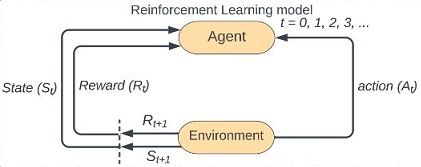

In [2]:
import numpy as np
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
Num_actions = 10
qs = np.random.randn(1, Num_actions)
optimal_action = np.argmax(qs)
Time_step = 10000
epsilon = 0.2

**Plot greedy**

In [4]:
def plot_greedy(reward, select_action, optimal_action, til, epsilon):
    !mkdir Images
    Optimal_Action_Percent = np.mean(select_action == optimal_action)
    fig, axs = plt.subplots(nrows=2, figsize=(6, 5))
    plt.rcParams.update({'font.size': 10})
    axs[0].plot(reward.flatten(),label='$\epsilon$-greedy Rewards')
    axs[0].set_ylabel('Reward', fontsize=10)
    # axs[0].legend(fontsize=16, ncol=1, frameon=False, loc='best', labelcolor='linecolor', handlelength=0)
    axs[0].set_title(f"Optimal action percent: {Optimal_Action_Percent*100:0.0f}%", loc='right', y=1 + 0.17, pad=-20, color='deeppink', fontsize=10, fontstyle='italic')

    axs[1].plot(select_action.flatten(),label='$\epsilon:$-greedy Selected Actions')
    axs[1].set_xlabel('Time Step', fontsize=10)
    axs[1].set_ylabel('Selected Actions', fontsize=10)
    # axs[1].legend(fontsize=16, ncol=1, frameon=False, loc='best', labelcolor='linecolor', handlelength=0)
    axs[1].set_title(f"Optimal action: {optimal_action}; $\epsilon$:{epsilon}", loc='right', y=1 + 0.17, pad=-20, color='deeppink', fontsize=10, fontstyle='italic')
    plt.tight_layout(), plt.subplots_adjust(wspace=0, hspace=0.2), plt.show()

    filename = f'Images/{til}.svg'
    fig.savefig(filename, format='svg')

**Greedy Algorithm:**
Greedy algorithm only consider the reward at the moment and do not take the long-term into consideration (action only based on max A).
Greedy algorithm based solely on exploitation.
*Exploitation* is when the agent knows all his options and chooses the best option based on the previous success rates

**Greedy Algorithm for stationary state**
$Q(A) \leftarrow Q(A)+\frac{R-Q(A)}{N(A)}$; $N(A)\leftarrow$ Average samples

Time_step:: 100%|██████████| 10000/10000 [00:01<00:00, 5649.51it/s]

Q greedy algorithm: [[-0.83055273  0.          0.         -0.39407708  2.23551463  0.
  -0.83372061  0.          0.          0.        ]]


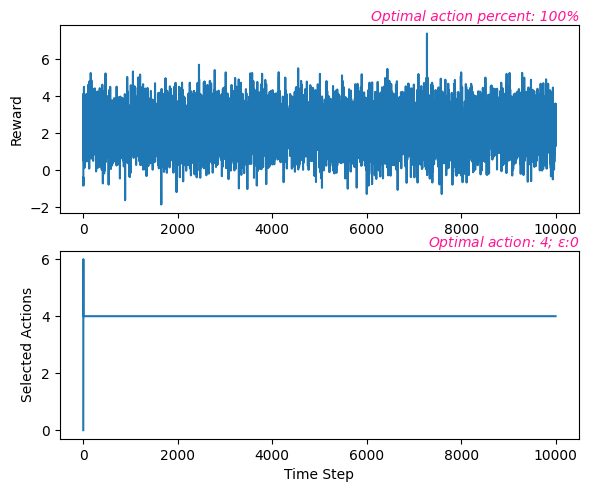

In [5]:
def greedy_1episode (qs, time_step, num_actions, epsilon, til):
    Optimal_action = np.argmax(qs)
    select_action = np.zeros((1, time_step))
    reward = np.zeros((1, time_step))
    q = np.zeros((1, num_actions))
    counter = np.zeros((1, num_actions))

    for i in tqdm(range(0, time_step), desc="Time_step:"):
    # ===================================== Exploitation =========================================
        A = np.where(q == np.max(q))[1]
        A = A[np.random.randint(0, len(A))]

        select_action[:, i] = A
        counter[:, A] = counter[:, A] + 1           # The number of occurrences of action A

        reward[:, i] = qs[:, A] + np.random.randn(1)

        q[:, A] = q[:, A] + 1 / counter[:, A] * (reward[:, i] - q[:, A])
    # ============================================================================================
    print(f"Q greedy algorithm: {q}")
    plot_greedy(reward, select_action, Optimal_action, til, epsilon,)

greedy_1episode(qs, Time_step, Num_actions, epsilon=0, til='Greedy')

**Epsilon greedy Algorithm for stationary state**
It algorithm based on exploitation ana exploration.
Giving chance to all actions.
$Q(A) \leftarrow Q(A)+\frac{R-Q(A)}{N(A)}$; $N(A)\leftarrow$ Average samples

Time_step:: 100%|██████████| 10000/10000 [00:00<00:00, 14141.64it/s]

Q greedy algorithm: [[ 0.          1.28727851  2.56711978 -1.10178335  0.45901934  1.33016747
   0.36592749  0.38494569  0.0163293   1.45472331]]



A subdirectory or file Images already exists.


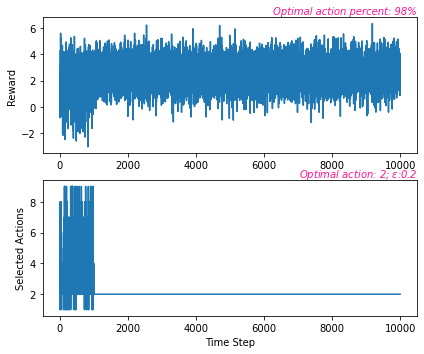

In [47]:
def epsilon_greedy_1episode (qs, time_step, num_actions, epsilon, til):
    Optimal_action = np.argmax(qs)
    select_action = np.zeros((1, time_step))
    reward = np.zeros((1, time_step))
    q = np.zeros((1, num_actions))
    counter = np.zeros((1, num_actions))
    for i in tqdm(range(0,time_step), desc="Time_step:"):
    # ===================================== Exploitation =========================================
        A = np.where(q==np.max(q))[1]
        A = A[np.random.randint(0,len(A))]
    # ---------------------------------------- Exploration ---------------------------------------
        if i > 1e3:
            """
            The greedy algorithm can be used if there is a good interaction with the environment and sufficient knowledge of the environment.
            """
            epsilon = 0
        if np.random.rand(1) < epsilon:            #  [0 1]  epsilon = 0.1
           A =  np.random.randint(1,num_actions , 1)
    # --------------------------------------------------------------------------------------------
        select_action[:,i] = A
        counter[:,A] = counter[:,A]+1

        reward[:,i] = qs[:,A] + np.random.randn(1)

        q[:,A] = q[:,A] + 1/counter[:,A]*(reward[:,i] - q[:,A])
    # ============================================================================================
    print(f"Q greedy algorithm: {q}")
    plot_greedy(reward, select_action, Optimal_action, til, epsilon=0.2)

epsilon_greedy_1episode (qs, Time_step, Num_actions, epsilon, til='e-greedy')

**Epsilon greedy Algorithm for N episode in stationary & non-stationary state**
$Q(A) \leftarrow Q(A)+\frac{R-Q(A)}{N(A)}$; $N(A)\leftarrow$ Average samples
$Q(A) \leftarrow Q(A)+\alpha*({R-Q(A)})$; $\alpha\leftarrow$ Constant alpha

A subdirectory or file Images already exists.
Number_episode:: 100%|██████████| 1000/1000 [02:46<00:00,  6.01it/s]
A subdirectory or file Images already exists.
Number_episode:: 100%|██████████| 1000/1000 [02:12<00:00,  7.52it/s]
A subdirectory or file Images already exists.
Number_episode:: 100%|██████████| 1000/1000 [02:38<00:00,  6.33it/s]
A subdirectory or file Images already exists.
Number_episode:: 100%|██████████| 1000/1000 [04:03<00:00,  4.11it/s]


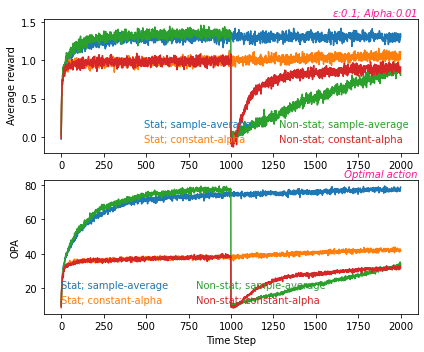

'\nStat:stationary\nNon-Stat: Non-stationary\n'

In [58]:
def epsilon_greedy_Nepisode (axs, num_actions, time_step, num_episode, alpha, epsilon, type, method):
    select_action = np.zeros((time_step, num_episode))
    reward = np.zeros((time_step, num_episode))
    optimal_action = np.zeros((time_step, num_episode))

    for i in tqdm(range(0, num_episode), desc="Number_episode:"):

        qs = np.random.randn(1, num_actions)
        q = np.zeros((1, num_actions))
        counter = np.zeros((1, num_actions))
        for j in range(0, time_step):
            # ===================================== Exploitation =============================================
            if (j == np.floor(time_step / 2)) and (type == 'Non-stat'):  # Non-stationary
                qs = np.random.randn(1, num_actions)

            optimal_action[j, i] = np.argmax(qs)
            A = np.where(q == np.max(q))[1]
            A = A[np.random.randint(0, len(A))]
            # ---------------------------------------- Exploration -------------------------------------------
            if np.random.rand(1) < epsilon:  #  [0 1]  epsilon = 0.1
                A = np.random.randint(1, num_actions, 1)
            # ------------------------------------------------------------------------------------------------
            select_action[j, i] = A
            reward[j, i] = qs[:, A] + np.random.randn(1)
            counter[:, A] = counter[:, A] + 1
            if method == 'sample-average':
                q[:, A] = q[:, A] + (1 / counter[:, A]) * (reward[j, i] - q[:, A])
            else:
                q[:, A] = q[:, A] + alpha * (reward[j, i] - q[:, A])

    mean_reward = np.mean(reward, axis=1)
    optimal_action_percent = np.zeros((time_step, num_episode))

    for i in range(0, num_episode):
        optimal_action_percent[:, i] = select_action[:, i] == optimal_action[:, i]

    optimal_action_percent = np.mean(optimal_action_percent, axis=1)

    # fig, axs = plt.subplots(nrows=2, ncols=1, sharey='row', figsize=(7, 5))
    plt.rcParams.update({'font.size': 10})
    axs[0].plot(mean_reward, label=type+'; '+method)
    axs[0].set_ylabel(' Average reward')
    axs[0].legend(fontsize=10, ncol=2, frameon=False, loc='best', labelcolor='linecolor', handlelength=0)
    axs[0].set_title(f"$\epsilon$:{epsilon}; Alpha:{alpha}", loc='right', y=1 + 0.17, pad=-20, color='deeppink', fontsize=10, fontstyle='italic')

    axs[1].plot(optimal_action_percent * 100, label=type+'; '+ method)
    axs[1].set_xlabel('Time Step')
    axs[1].set_ylabel('OPA')
    axs[1].legend(fontsize=10, ncol=2, frameon=False, loc='best', labelcolor='linecolor', handlelength=0)
    axs[1].set_title(f" Optimal action", loc='right', y=1 + 0.17, pad=-20, color='deeppink', fontsize=10, fontstyle='italic')
    plt.tight_layout(), plt.subplots_adjust(wspace=0, hspace=0.2)


alpha = 0.01
epsilon = 0.1
num_actions = 10
time_step = 2000
num_episode = 1000
fig, axs = plt.subplots(nrows=2, ncols=1, sharey='row', figsize=(6, 5))
epsilon_greedy_Nepisode(axs, num_actions, time_step, num_episode, alpha, epsilon, type='Stat', method='sample-average')
epsilon_greedy_Nepisode(axs, num_actions, time_step, num_episode, alpha, epsilon, type='Stat', method='constant-alpha')
epsilon_greedy_Nepisode(axs, num_actions, time_step, num_episode, alpha, epsilon, type='Non-stat', method='sample-average')
epsilon_greedy_Nepisode(axs, num_actions, time_step, num_episode, alpha, epsilon, type='Non-stat', method='constant-alpha')
plt.show()
!mkdir Images
filename = f'Images/E-greedy_Nepisode.svg'
fig.savefig(filename, format='svg')
"""
Stat:stationary
Non-Stat: Non-stationary
"""

**Upper confidence bound policy (UCB):**
$A_{t} = argmax {\left\lbrack\ Q_{t} + c*\sqrt{log(t) \over N_{t}(a)} \right\rbrack}$

Number_episode::   0%|          | 0/1000 [00:00<?, ?it/s]C:\Users\rsaad\AppData\Local\Temp\ipykernel_6124\896011452.py:17: RuntimeWarning: invalid value encountered in true_divide
  B = q + c * np.sqrt(np.log(j + 1) / counter)
C:\Users\rsaad\AppData\Local\Temp\ipykernel_6124\896011452.py:17: RuntimeWarning: divide by zero encountered in true_divide
  B = q + c * np.sqrt(np.log(j + 1) / counter)
Number_episode::   0%|          | 0/1000 [00:00<?, ?it/s]C:\Users\rsaad\AppData\Local\Temp\ipykernel_6124\896011452.py:17: RuntimeWarning: invalid value encountered in true_divide
  B = q + c * np.sqrt(np.log(j + 1) / counter)
C:\Users\rsaad\AppData\Local\Temp\ipykernel_6124\896011452.py:17: RuntimeWarning: divide by zero encountered in true_divide
  B = q + c * np.sqrt(np.log(j + 1) / counter)
Number_episode::   0%|          | 0/1000 [00:00<?, ?it/s]C:\Users\rsaad\AppData\Local\Temp\ipykernel_6124\896011452.py:17: RuntimeWarning: invalid value encountered in true_divide
  B = q + c * np.sqrt(np

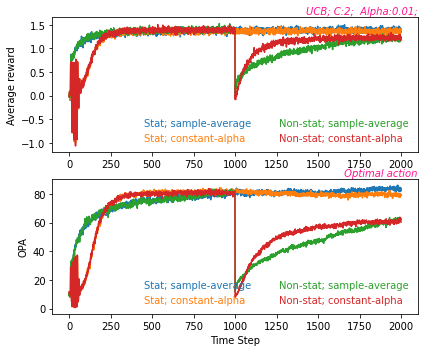

'\nStat:stationary\nNon-Stat: Non-stationary\n'

In [67]:
def UCB(axs, num_actions, time_step, num_episode, c, alpha, epsilon, type, method):
    select_action = np.zeros((Time_step, num_episode))
    reward = np.zeros((Time_step, num_episode))
    optimal_action = np.zeros((Time_step, num_episode))

    for i in tqdm(range(0, num_episode), desc="Number_episode:"):

        qs = np.random.randn(1, Num_actions)
        q = np.zeros((1, Num_actions))
        counter = np.zeros((1, Num_actions))
        for j in range(0, Time_step):
            # ===================================== Exploitation =============================================
            if (j == np.floor(Time_step / 2)) and (type == 'Non-stat'):  # Non-stationary
                qs = np.random.randn(1, Num_actions)

            optimal_action[j, i] = np.argmax(qs)
            B = q + c * np.sqrt(np.log(j + 1) / counter)
            B = np.where(np.isnan(B), 1e10, B)
            B = np.where(np.isinf(B), 1e10, B)
            A = np.where(B == np.max(B))[1]
            A = A[np.random.randint(0, len(A))]
            # ---------------------------------------- Exploration -------------------------------------------
            if np.random.rand(1) < epsilon:  #  [0 1]  epsilon = 0.1
                A = np.random.randint(1, Num_actions, 1)
            # ------------------------------------------------------------------------------------------------
            select_action[j, i] = A
            reward[j, i] = qs[:, A] + np.random.randn(1)
            counter[:, A] = counter[:, A] + 1
            if method == 'sample-average':
                q[:, A] = q[:, A] + (1 / counter[:, A]) * (reward[j, i] - q[:, A])
            else:
                q[:, A] = q[:, A] + alpha * (reward[j, i] - q[:, A])

    mean_reward = np.mean(reward, axis=1)
    optimal_action_percent = np.zeros((Time_step, num_episode))

    for i in range(0, num_episode):
        optimal_action_percent[:, i] = select_action[:, i] == optimal_action[:, i]
    optimal_action_percent = np.mean(optimal_action_percent, axis=1)

    plt.rcParams.update({'font.size': 10})
    axs[0].plot(mean_reward, label=type + '; ' + method)
    axs[0].set_ylabel('Average reward')
    axs[0].legend(fontsize=10, ncol=2, frameon=False, loc='best', labelcolor='linecolor', handlelength=0)
    axs[0].set_title(f"UCB; C:{c};  Alpha:{alpha}", loc='right', y=1 + 0.17, pad=-20, color='deeppink', fontsize=10, fontstyle='italic')

    axs[1].plot(optimal_action_percent * 100, label=type + '; ' + method)
    axs[1].set_xlabel('Time Step')
    axs[1].set_ylabel('OPA')
    axs[1].legend(fontsize=10, ncol=2, frameon=False, loc='best', labelcolor='linecolor', handlelength=0)
    axs[1].set_title(f" Optimal action", loc='right', y=1 + 0.17, pad=-20, color='deeppink', fontsize=10, fontstyle='italic')
    plt.tight_layout(), plt.subplots_adjust(wspace=0, hspace=0.2),


Num_actions = 10
c = 2
Time_step = 2000
alpha = 0.01
num_episode = 1000

fig, axs = plt.subplots(nrows=2, ncols=1, sharey='row', figsize=(6, 5))
UCB(axs, num_actions, time_step, num_episode, c, alpha, epsilon, type='Stat', method='sample-average')
UCB(axs, num_actions, time_step, num_episode, c, alpha, epsilon, type='Stat', method='constant-alpha')
UCB(axs, num_actions, time_step, num_episode, c, alpha, epsilon, type='Non-stat', method='sample-average')
UCB(axs, num_actions, time_step, num_episode, c, alpha, epsilon, type='Non-stat', method='constant-alpha')
!mkdir Images
filename = f'Images/UCB.svg'
fig.savefig(filename, format='svg')
plt.show()
"""
Stat:stationary
Non-Stat: Non-stationary
"""

**Gradient bandit (Stochastic gradient ascent (SGA))**
$Pr({A_{t}=a})$=$e^{H_{t}(a)}\over{\sum_{b=1}^k e^{H_{t}(b)}}$=$\pi_{t}(a)$
$H_{t+1}(a)= H_t(a) + \alpha*(R_t - mean(R_t))(1_{\alpha=A_{t}} - \pi_{t}(a)$

Number_episode:: 100%|██████████| 100/100 [00:50<00:00,  1.99it/s]


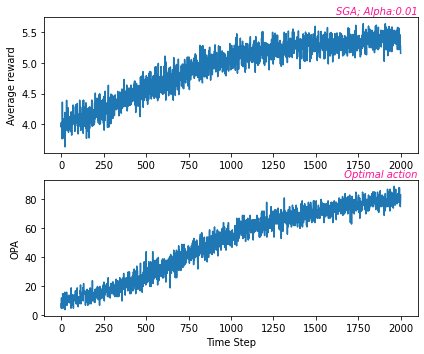

A subdirectory or file Images already exists.


In [74]:
Num_actions = 10
Time_step = 2000                    # Time step
alpha = 0.01
num_episode = 100
reward = np.zeros((Time_step, num_episode))
select_action = np.zeros((Time_step, num_episode))
optimal_action = np.zeros((1, num_episode))
optimal_action_percent = np.zeros((Time_step, num_episode))

for i in tqdm(range(0, num_episode), desc="Number_episode:"):

    h = np.ones((1, Num_actions))
    qs = 4 + np.random.randn(1, Num_actions)
    optimal_action[:, i] = np.argmax(qs)
    for j in range(0, Time_step):
        pr = np.exp(h)/np.sum(np.exp(h), axis=1)
        A = np.random.choice( range(0, Num_actions) , size = 1, replace = False, p = pr.flatten())

        select_action[j, i] = A
        reward[j, i] = qs[:, A] + np.random.randn(1)

        if j==0:
            baseline = reward[j, i]
        else:
            baseline = np.mean(reward[0:j, i])

        h = h + alpha*(reward[j, i] - baseline)*(np.where(np.arange(10)==A,1-pr,-pr))

mean_reward = np.mean(reward, axis=1)

for i in range(0, num_episode):
    optimal_action_percent[:, i] = select_action[:, i] == optimal_action[:, i]
optimal_action_percent = np.mean(optimal_action_percent, axis=1)

fig, axs = plt.subplots(nrows=2, ncols=1, sharey='row', figsize=(6, 5))
plt.rcParams.update({'font.size': 10})
axs[0].plot(mean_reward, label='E-greedy Rewards')
axs[0].set_ylabel('Average reward')
axs[0].set_title(f"SGA; Alpha:{alpha}", loc='right', y=1 + 0.17, pad=-20, color='deeppink', fontsize=10, fontstyle='italic')

axs[1].plot(optimal_action_percent * 100, label='Optimal action')
axs[1].set_xlabel('Time Step')
axs[1].set_ylabel('OPA')
axs[1].set_title(f" Optimal action", loc='right', y=1 + 0.17, pad=-20, color='deeppink', fontsize=10, fontstyle='italic')
plt.tight_layout(), plt.subplots_adjust(wspace=0, hspace=0.2), plt.show()

!mkdir Images
filename = f'Images/SGA.svg'
fig.savefig(filename, format='svg')
plt.show()

**Set Parameters Epsilon greedy, UCB & SGA**

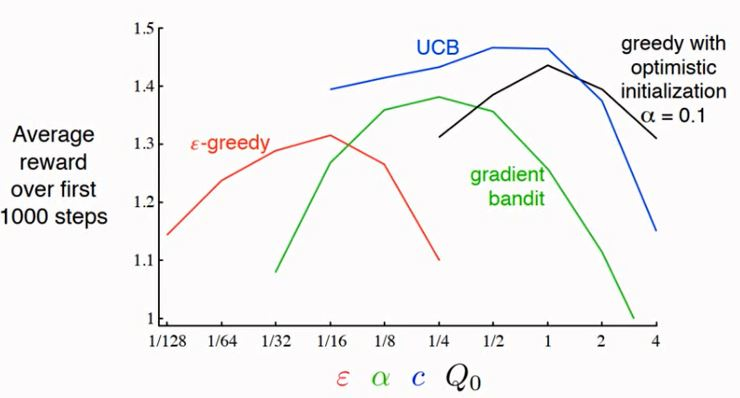

In [71]:
img_path='Set Parameters.JPG'
img=Image.open(img_path)
img